# Volatility decay in Leveraged ETFs
Leveraged ETFs are designed to amplify the returns of a benchmark index by a certain factor, usually 2x or 3x, on a daily basis. 
For example if an ETF promises a return of 2 times the S&P 500 index then if the S&P 500 index goes up 1% in one day the ETF will go up 2 x 1% = 2%.
##
There is a common myth about Leveraged ETFs which states that they are not suitable for long term buy and hold. This article rectifies that deficiency and finds that the claims are false.
##
The explanation popularly given for this myth is that volatility eats away at long term returns. If this were true then non-leveraged funds would also not be suitable for buy and hold because they too suffer from volatility.


## Origins of the myth
Daily volatility hurts the returns of leveraged ETFs (including unleveraged ETFs). The math is simple. If the market goes down by $x$ one day and up by the same $x$ the next day, the net returns after the 2 days are given by:
###
$(1 - x)(1 + x) = 1 - x^2$
###
As $x^2$ is positive but the sign in front is negative, your position will always suffer a loss of $x^2$. For example, if the market goes down 5% one day, then up by 5%. The net result is $(1-0.05)(1+0.05)= 0.9975$; a loss of 0.0025 or 0.25%. 
So whenever the market has volatility we lose money. We call this <i>volatility decay</i>.

Have a look at the graph below to enhance our comprehension of this concept:


 




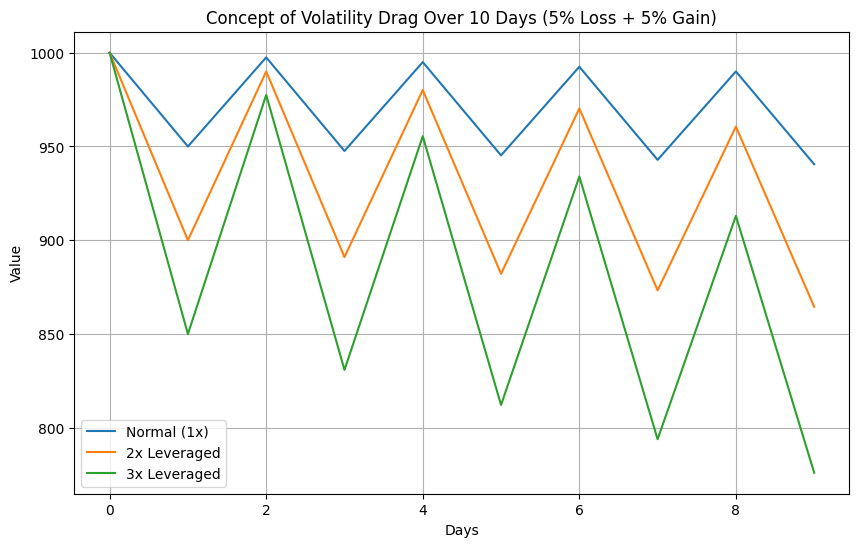

In [1]:
import matplotlib.pyplot as plt
days = list(range(10))  # Use 10 days
normal_etf = [1000, 950, 997.50, 947.62, 995.00, 945.25, 992.51, 942.88, 990.02, 940.52]
leveraged_2x = [1000, 900, 990, 891, 980.10, 882.09, 970.30, 873.27, 960.60, 864.54]
leveraged_3x = [1000, 850, 977.50, 830.87, 955.50, 812.17, 934.00, 793.90, 912.99, 776.04]

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(days, normal_etf, label='Normal (1x)')
plt.plot(days, leveraged_2x, label='2x Leveraged')
plt.plot(days, leveraged_3x, label='3x Leveraged')

# Add labels and a legend
plt.xlabel('Days')
plt.ylabel('Value')
plt.title('Concept of Volatility Drag Over 10 Days (5% Loss + 5% Gain)')
plt.legend()

# Show the plot
plt.grid()
plt.show()

Increasing leverage increases the value of $x$, and therefore $x^2$, causing greater volatility decay. Even an ETF with a leverage of 1 has volatility decay. 

The myth has resulted from the belief that volatility decay will drag any leveraged ETF down to zero given enough time. Conventional wisdom has decided that employing no leverage, which is in fact a 1x multiple, might strike the optimal balance between volatility decay and capturing market returns. Yet there’s nothing special about a 1x multiple, nor any inherent reason that 1x leverage is “optimal”. The “optimal” amount of leverage, under historical market conditions, might be 0.8x, 1.2x or 1.5x or some such. It is very unlikely to be neatly 1x. 



In fact, it is no secret that at least in the decade, if an investor used a “buy and hold” strategy on 2x or 3x leveraged ETFs, they would have significantly outperformed a 1x “buy and hold” strategy of the underlying index (see figure 1):


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


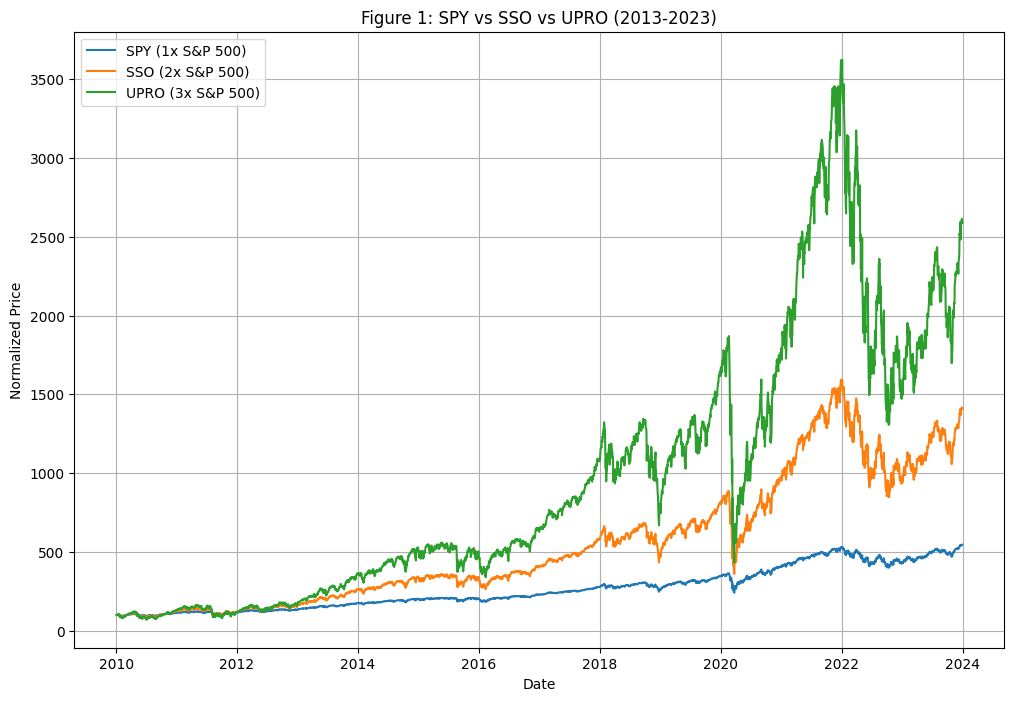

In [4]:
import yfinance as yf

# Download historical data for SPY (1x S&P 500), SSO (2x S&P 500), and UPRO (3x S&P 500)
start_date = '2010-01-01'
end_date = '2024-01-01'
spy = yf.download('SPY', start=start_date, end=end_date)
sso = yf.download('SSO', start=start_date, end=end_date)
upro = yf.download('UPRO', start=start_date, end=end_date)

# Normalize the data to start at the same point
spy['Normalized'] = spy['Adj Close'] / spy['Adj Close'].iloc[0] * 100
sso['Normalized'] = sso['Adj Close'] / sso['Adj Close'].iloc[0] * 100
upro['Normalized'] = upro['Adj Close'] / upro['Adj Close'].iloc[0] * 100

# Plot the results
plt.figure(figsize=(12, 8))
plt.plot(spy['Normalized'], label='SPY (1x S&P 500)')
plt.plot(sso['Normalized'], label='SSO (2x S&P 500)')
plt.plot(upro['Normalized'], label='UPRO (3x S&P 500)')
plt.title('Figure 1: SPY vs SSO vs UPRO (2013-2023)')
plt.xlabel('Date')
plt.ylabel('Normalized Price')
plt.legend()
plt.grid(True)
plt.show()


Of course, the past decade has seen an almost uninterrupted bull run except for the brief market crash in 2020 from COVID. There’s no question that when the markets go up rapidly, leverage amplifies the gains. The argument against leveraged ETFs always boils down to underperformance when the markets are volatile. 



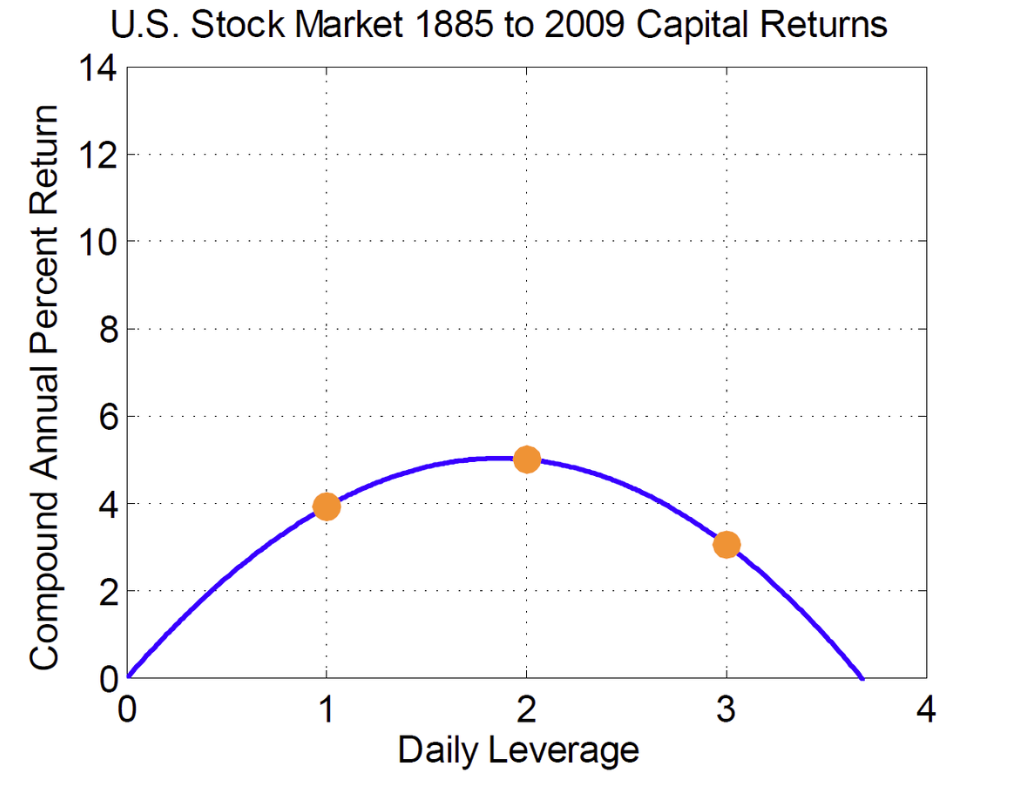
Image source: Cooper, Tony. Alpha Generation and Risk Smoothing Using Managed Volatility. 


As you can see, returns increase as leverage increases, up to the “optimal” amount of leverage to maximize returns, at least for this set of market conditions over this time period,  was not 1x nor 3x, but in fact close to 2x. We also see that as the leverage continues to increase beyond 2x, the returns trail again, due to exponentially increasing volatility drag. 

There is nothing magic about the leverage value 1. There is no mathematical reason for returns to suddenly level off at that leverage. The myth propagators are wrong. Leveraged ETFs can be held long term.

Let's perform a simulation to further provide evidence of this. 

##  SPX Simulation
We will be simulating the a year of the SPX index by calculating the probability of positive days and negative days occuring as well as the frequency of their occurrence based on SPX data from 1927-2023.

In [7]:
# Imports
import pandas as pd
import matplotlib.dates as mdates
import datetime
import numpy as np
import seaborn as sns

file_path = "/^SPX.csv"
df = pd.read_csv(file_path)